start: 2020/05/07 20:21:51
score[000]: 0.006166270202618618
score[001]: 0.004923970439625003
score[002]: 0.00495776378421553
score[003]: 0.0046637665722812915
score[004]: 0.005179684881381208
score[005]: 0.004945315625038971
score[006]: 0.0048500621713420955
score[007]: 0.005236607578990471
score[008]: 0.005090126589013089
score[009]: 0.004628579817919198
score[010]: 0.002897284105345732
score[011]: 0.003330800326432626
score[012]: 0.004370952521836502
score[013]: 0.004797715757019039
score[014]: 0.004104327688715381
score[015]: 0.0032660630334648832
score[016]: 0.004736503894040012
score[017]: 0.005833468688546173
score[018]: 0.004855571053166252
score[019]: 0.0059303244610956485
score[020]: 0.005936035707424403
score[021]: 0.004002545908877053
score[022]: 0.0045569341086751924
score[023]: 0.0045446727052452784
score[024]: 0.00424086859964401
score[025]: 0.004384751952379418
score[026]: 0.004320493584659468
score[027]: 0.004505935559913854
score[028]: 0.0049212883356577475
score[029]:

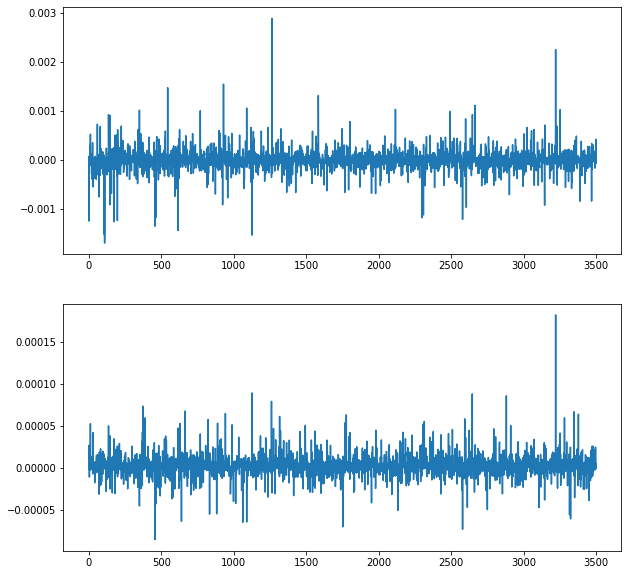

end: 2020/05/07 20:24:12


In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v7"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    b = bitcoin.BitcoinRegression(csv)
    print(f"score[avg]: {b.calc_avg_score()}")
    model = b.create_model()

    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()